# Dati CCS

scarico e ritaglio i dati di clorofilla da:
https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-ocean-colour?tab=overview

consultato il 30/10/2023



In [1]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np
# import plt
import matplotlib.pyplot as plt
import cdsapi

import subprocess


## Percorsi

questi sono i percorsi su cui lavorea questo script

In [4]:
# origin path
path_down = '/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily'
pathDEST = '/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_area'
pathCOARS =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened'


limiti in cui faccio il ritaglio


In [6]:
xmin = -5
xmax = 50
ymin = 72
ymax = 85


questo è il ciclo che scarica e pre-processa tutti i file

In [11]:
# ciclo per gli anni dal 1998 al 2019
for year in range(1998,1999):
    # cartella di output
    pC = os.path.join(pathCOARS, str(year))
    # creo la cartella se non esiste
    os.makedirs(pC, exist_ok=True)
    
    
    # cartella di file croppoati
    pCr = os.path.join(pathDEST, str(year))
    os.makedirs(pCr, exist_ok=True)
    
    # cilco per mese
    for month in range(3,4):
        

        # eseguo il codice solo se il file non esiste
        if os.path.exists(pC + '/' + 'cds{:04d}_{:02d}.nc'.format(year, month)):
            print(f"File {str(year) + '-' + str(month)}  already exists in destination. Skipping...")
            continue
        
        # cartella di lavoro
        pD = os.path.join(path_down, str(year))
        
                
        # scarico il file
        c = cdsapi.Client()
        c.retrieve('satellite-ocean-colour',
        {
            'variable': 'mass_concentration_of_chlorophyll_a',
            'projection': 'regular_latitude_longitude_grid',
            'year': year,
            'month': '{:02d}'.format(month),
            'day': [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30', '31'
            ],
            'version': '6_0',
            'format': 'zip',
        },
        path_down + '/' + 'cds{:04d}_{:02d}.zip'.format(year, month) # Specifying the path and naming each file according to the year
        )
        
        # nome file
        fn = path_down + '/' + 'cds{:04d}_{:02d}.zip'.format(year, month)
        
        
        # cartella decompressione
        pE = path_down + '/' + '{:04d}/{:02d}'.format(year, month)
        os.makedirs(pE, exist_ok=True)
        
        # unzippo i file mensili
        command = f"unzip -o {fn} -d {pE}"
        result = subprocess.run(command, shell=True, capture_output=True, text=True)
        
        
        # rimuovo il file zip
        os.remove(fn)
        
        # leggo i file del mese
        #ds = xr.open_mfdataset(pE + '/*.nc', combine='by_coords')
        ds = xr.open_mfdataset(pE + '/*.nc', combine='by_coords')

        # croppo la regione
        ds = ds.sel(lat=slice(ymax, ymin), lon=slice(xmin, xmax))
        
        # salvo il file croppato
        ds.to_netcdf(pCr + '/' + 'cds{:04d}_{:02d}.nc'.format(year, month))
        
        # coarsening ignorando gli NA
        ds = ds.coarsen(lon = 3).mean()
        
        # salvo il file coarsened
        ds.to_netcdf(pC + '/' + 'cds{:04d}_{:02d}.nc'.format(year, month))
        
        # chiudo il file
        ds.close()
         
        
        
        # rimuovo la cartella pD e tutto il suo contenuto
        shutil.rmtree(pD, ignore_errors=True)
        shutil.rmtree(pE, ignore_errors=True)
        
        # stampo il mese e l'anno
        print(year, month)
        

    
    
    

2023-10-30 20:48:56,668 INFO Welcome to the CDS
2023-10-30 20:48:56,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-ocean-colour
2023-10-30 20:48:56,820 INFO Request is completed
2023-10-30 20:48:56,820 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/dataset-satellite-ocean-colour-3abfa426-b196-44dd-b258-e8cc46c5548f.zip to /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/cds1998_03.zip (736.4M)
2023-10-30 20:49:36,941 INFO Download rate 18.4M/s 


TypeError: unhashable type: 'slice'

In [62]:
year = 2022
month = 6

# se esiste la cartella, non la crea

# for year in range(2022, 2023):
#     c = cdsapi.Client()
    c.retrieve(
        'satellite-ocean-colour',
        {
            'variable': 'mass_concentration_of_chlorophyll_a',
            'projection': 'regular_latitude_longitude_grid',
            'year': year,
            'month': '{:02d}'.format(month),
            'day': [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30', '31'
            ],
            'version': '6_0',
            'format': 'zip',
        },
        path_down + '/' + 'cds{:04d}_{:02d}.zip'.format(year, month) # Specifying the path and naming each file according to the year
    )
    
    #controlla se esiste, e altrimenti crea la cartella path_down + '/' + '{:04d}/{:02d}.format(year, month)


# extract the zip file
# controlla se esiste il file path_down + '/' + 'cds{:04d}_{:02d}.zip'.format(year, month)
fn = path_down + '/' + 'cds{:04d}_{:02d}.zip'.format(year, month)
fn

dp = path_down + '/' + '{:04d}/{:02d}'.format(year, month)
os.makedirs(dp, exist_ok=True)


In [63]:
dp

'/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/2022/06'

testo unzip

In [64]:


# Esecuzione del comando unzip
command = f"unzip {fn} -d {dp}"
result = subprocess.run(command, shell=True, capture_output=True, text=True)

# Stampa l'output
print(result.stdout)

Archive:  /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/cds2022_06.zip
 extracting: /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/2022/06/ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220620-fv6.0.nc  
 extracting: /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/2022/06/ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220606-fv6.0.nc  
 extracting: /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/2022/06/ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220605-fv6.0.nc  
 extracting: /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/2022/06/ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220625-fv6.0.nc  
 extracting: /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/2022/06/ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220613-fv6.0.nc  
 extracting: /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily/2022/06/ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220624-fv6.0.nc  
 extracting: /mnt/d/Dropbox

/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_area/cds2022_06.zip: Zip archive data, at least v2.0 to extract
Archive:  /mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_area/cds2022_06.zip
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220620-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220606-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220605-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220625-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220613-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220624-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220621-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220622-fv6.0.nc  
 extracting: ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220615-fv6.0.nc  
 extracting: ES

In [67]:
#  file lists in folder pd
fl = os.listdir(dp)
fl



['ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220601-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220602-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220603-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220604-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220605-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220606-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220607-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220608-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220609-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220610-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220611-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220612-fv6.0.nc',
 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20220613-fv6.0.nc',
 'ESACCI-OC-

In [70]:
# leggo il primo file
fn = dp + '/' + fl[0]
fn
ds = xr.open_dataset(fn)
ds

<xarray.Dataset>
Dimensions:       (time: 1, lat: 4320, lon: 8640)
Coordinates:
  * lat           (lat) float64 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon           (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time          (time) datetime64[ns] 2022-06-01
Data variables:
    MERIS_nobs    (time, lat, lon) float32 ...
    MODISA_nobs   (time, lat, lon) float32 ...
    OLCI-A_nobs   (time, lat, lon) float32 ...
    OLCI-B_nobs   (time, lat, lon) float32 ...
    SeaWiFS_nobs  (time, lat, lon) float32 ...
    VIIRS_nobs    (time, lat, lon) float32 ...
    chlor_a       (time, lat, lon) float32 ...
    crs           int32 ...
    total_nobs    (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20221201T172049Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            202206010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    deb3bdae-cf6d-4a37-aad4-998a347f469d
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...

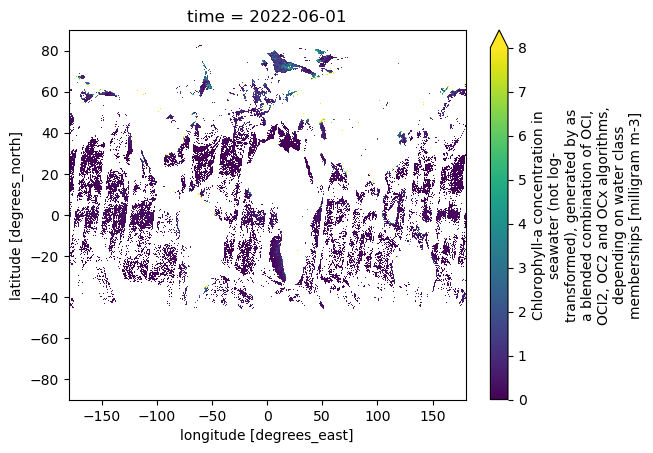

In [72]:
ds.chlor_a.plot(vmin=0, vmax=8, cmap='viridis')

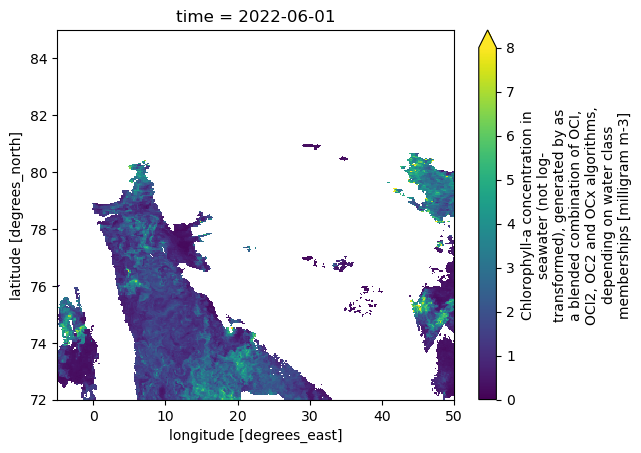

In [73]:
xmin = -5
xmax = 50
ymin = 72
ymax = 85

ds.chlor_a.plot(vmin=0, vmax=8, cmap='viridis', xlim=(xmin, xmax), ylim=(ymin, ymax))

In [84]:
# taglio il dataset
ds_cut = ds.sel(lat=slice(ymax, ymin), lon=slice(xmin, xmax))
ds_cut

<xarray.Dataset>
Dimensions:       (time: 1, lat: 312, lon: 1320)
Coordinates:
  * lat           (lat) float64 84.98 84.94 84.9 84.85 ... 72.1 72.06 72.02
  * lon           (lon) float64 -4.979 -4.938 -4.896 -4.854 ... 49.9 49.94 49.98
  * time          (time) datetime64[ns] 2022-06-01
Data variables:
    MERIS_nobs    (time, lat, lon) float32 ...
    MODISA_nobs   (time, lat, lon) float32 ...
    OLCI-A_nobs   (time, lat, lon) float32 ...
    OLCI-B_nobs   (time, lat, lon) float32 ...
    SeaWiFS_nobs  (time, lat, lon) float32 ...
    VIIRS_nobs    (time, lat, lon) float32 ...
    chlor_a       (time, lat, lon) float32 ...
    crs           int32 -2147483647
    total_nobs    (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20221201T172049Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            202206010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    deb3bdae-cf6d-4a37-aad4-998a347f469d
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...

In [85]:
po = pathDEST + '/' + '{:04d}/{:02d}'.format(year, month)
po
os.makedirs(po, exist_ok=True)

In [86]:
# salvo il file
fn = po + '/' + fl[0]
fn
ds_cut.to_netcdf(fn)


In [90]:
# aggrego la longitudine in 3 celle




delta_longitude = abs(ds_cut.lon.values[1] - ds_cut.lon.values[0])

ds_coarsened = ds_cut.interp(lon=np.arange(ds_cut.lon[0], ds_cut.lon[-1], step = 3 * delta_longitude), method='nearest')

ds_coarsened

<xarray.Dataset>
Dimensions:       (time: 1, lat: 312, lon: 440)
Coordinates:
  * lat           (lat) float64 84.98 84.94 84.9 84.85 ... 72.1 72.06 72.02
  * time          (time) datetime64[ns] 2022-06-01
  * lon           (lon) float64 -4.979 -4.854 -4.729 -4.604 ... 49.65 49.77 49.9
Data variables:
    MERIS_nobs    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    MODISA_nobs   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    OLCI-A_nobs   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    OLCI-B_nobs   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    SeaWiFS_nobs  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    VIIRS_nobs    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    chlor_a       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    crs           int32 -2147483647
    total_nobs    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20221201T172049Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            202206010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    deb3bdae-cf6d-4a37-aad4-998a347f469d
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...